In [1]:
#Importing Keras packages
from __future__ import print_function
import os
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from keras import optimizers
from tensorflow.keras.preprocessing import image
from keras.layers.advanced_activations import ELU, LeakyReLU, PReLU, Softmax, ReLU
from keras.regularizers import l2
from tensorflow.keras import initializers

Using TensorFlow backend.


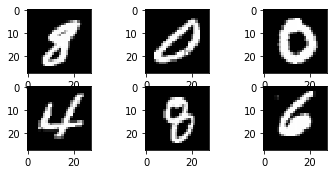

(60000, 10)
(10000, 10)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [2]:
#Loading the MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

#Data Pre-processing and Inspection
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

#Inspection
import matplotlib.pyplot as plt
import numpy as np

#Plotting 6 images with color map set to grey since the images are greyscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))
plt.show()

#Adding a 4th dimenion to the data by changing the original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

#Store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

#Change the image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalise the data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

#One-hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#Store the number of classes in a vector
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

In [3]:
#Ensuring the model is built on the existing GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1
physical_devices------------- 1


In [4]:
#Initiating LeNet for training
model = Sequential()

#Two sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5), padding = "same", input_shape = input_shape, kernel_regularizer = l2(0.0005), 
                 kernel_initializer = "he_normal"))
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(50, (5, 5), padding = "same", kernel_regularizer = l2(0.0005), 
                kernel_initializer = "he_normal"))
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#Fully connected layer
model.add(Flatten())
model.add(Dense(500, kernel_regularizer = l2(0.0005), kernel_initializer = "he_normal"))
model.add(Activation("elu"))

model.add(Dense(10, kernel_regularizer = l2(0.0005), kernel_initializer = "he_normal"))
model.add(Activation("softmax"))
    
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

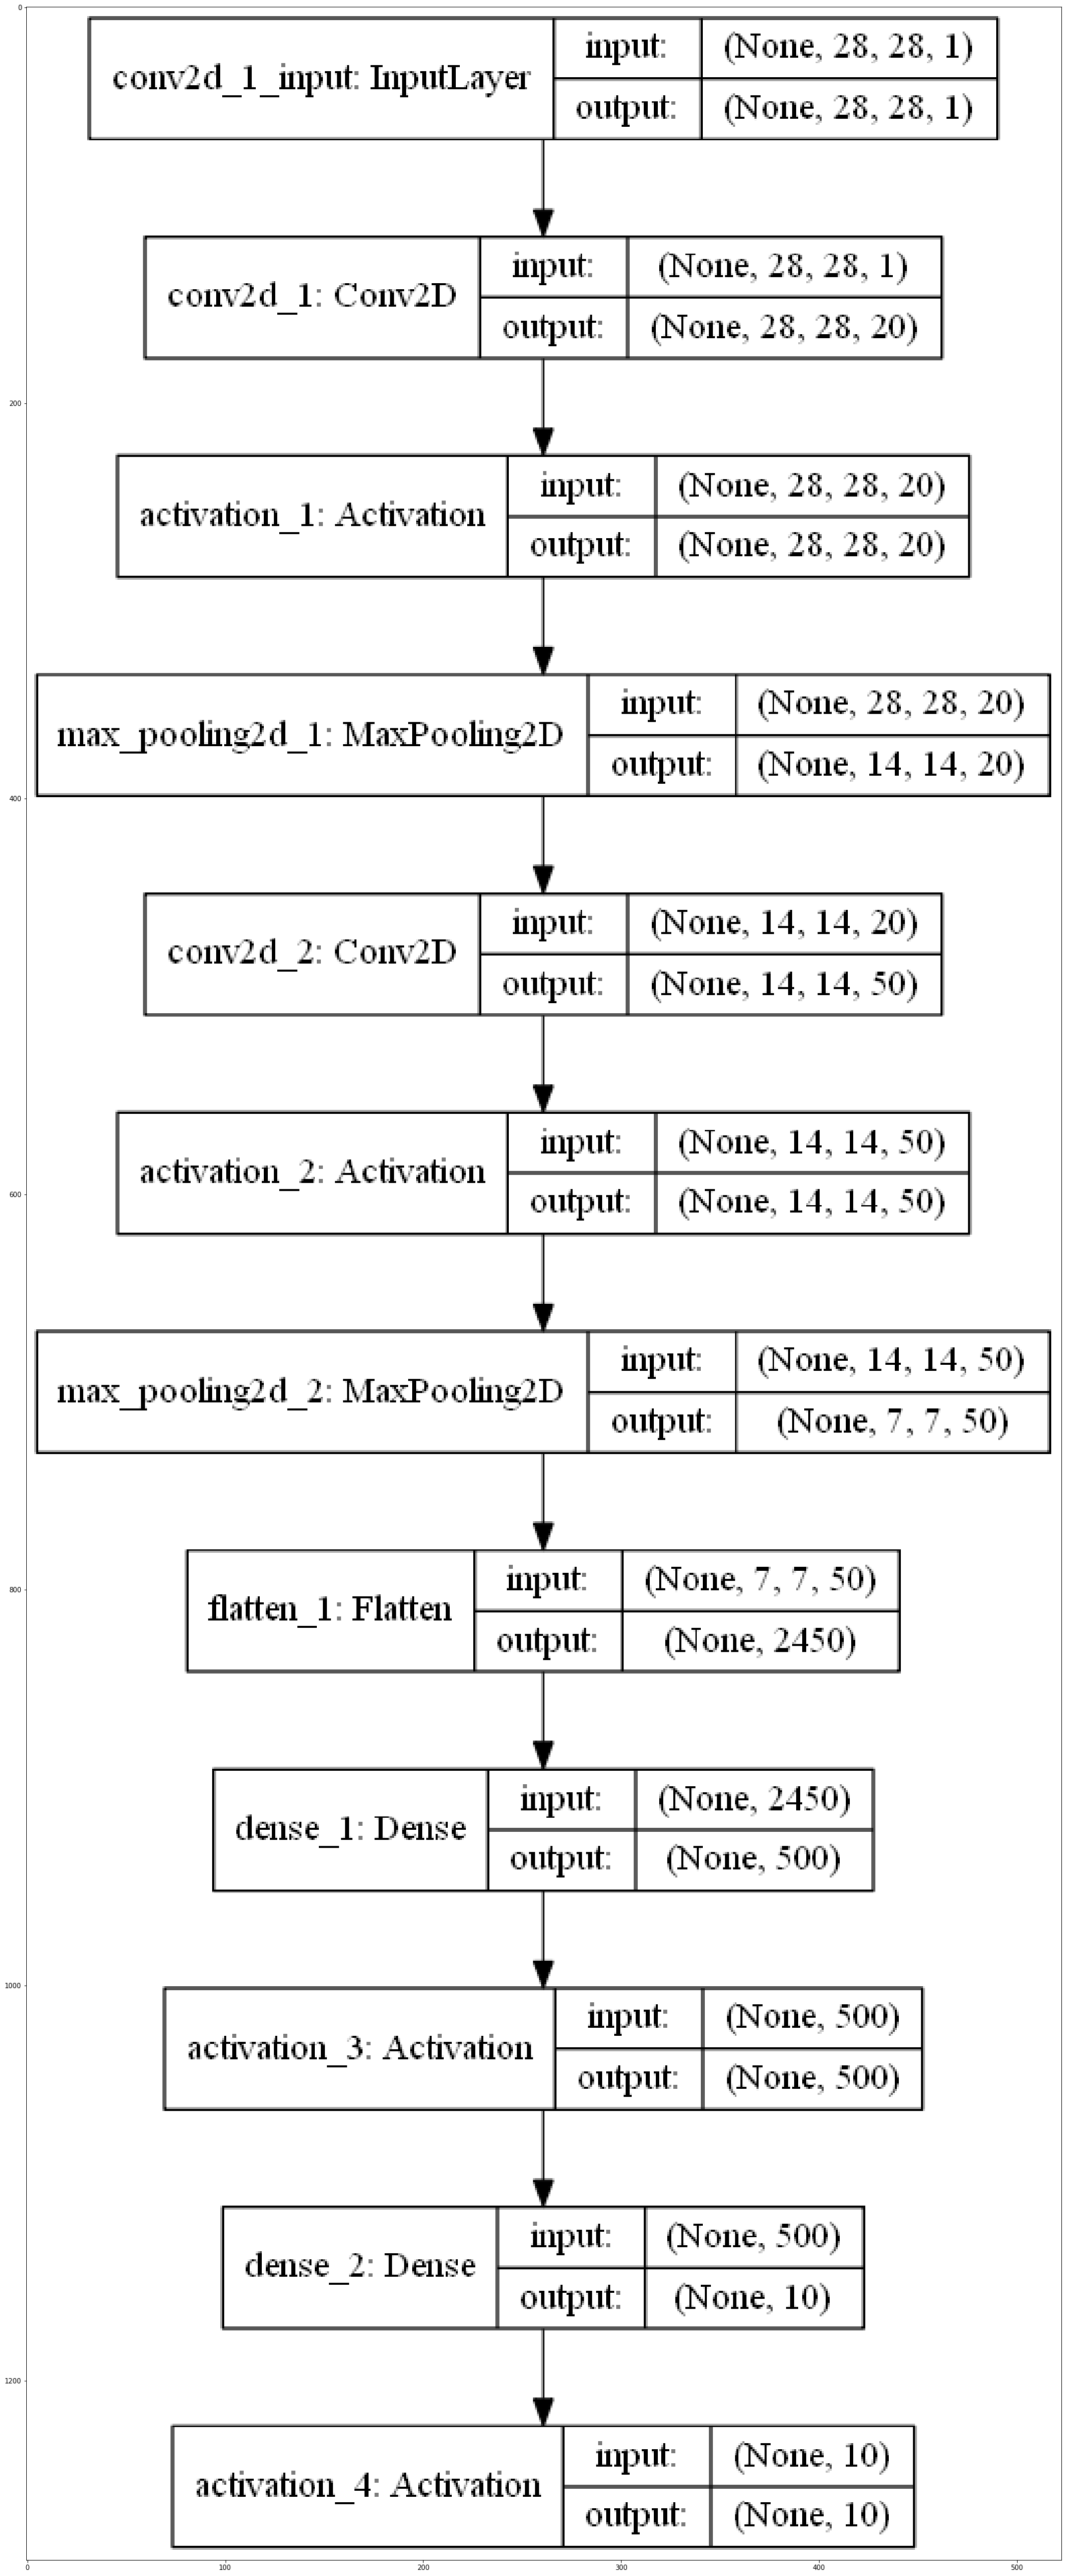

In [5]:
#Creating a diagram of the model
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file = 'C:\\Users\\Admin\\Desktop\\Research\\Results\\LeNet Results\\MNIST_LeNet_ELU_SGD.png', 
           show_shapes = True, show_layer_names = True)
img = mpimg.imread('MNIST_LeNet_ELU_SGD.png')
plt.figure(figsize = (100,70))
imgplot = plt.imshow(img) 

In [6]:
#Model testing and reporting
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.SGD(lr = 0.001, momentum = 0.9),
              metrics = ['accuracy'])

#Training Hyperparameters
batch_size = 128
epochs = 10

#Fitting the architecture
history = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (x_test, y_test),
          shuffle = True)

#Saving model weights
model.save("C:\\Users\\Admin\\Desktop\\Research\\Results\\LeNet Results\\Weights\\MNIST_LeNet_ELU_SGD_Weights.h5")

#Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.9957 - accuracy: 0.8801 - val_loss: 0.7795 - val_accuracy: 0.9402
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.7483 - accuracy: 0.9508 - val_loss: 0.7038 - val_accuracy: 0.9626
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.6978 - accuracy: 0.9646 - val_loss: 0.6741 - val_accuracy: 0.9695
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.6697 - accuracy: 0.9714 - val_loss: 0.6514 - val_accuracy: 0.9746
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.6497 - accuracy: 0.9758 - val_loss: 0.6337 - val_accuracy: 0.9776
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.6345 - accuracy: 0.9791 - val_loss: 0.6216 - val_accuracy: 0.9796
Epoch 7/10
60000/60000 [==============================] - 2s 31us/st

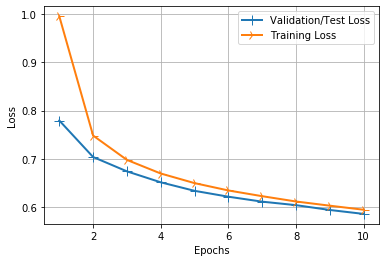

In [7]:
#Evaluating training and test error
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()